## Ratings_Electronics

In [116]:
import pandas as pd

## Step 1 Read and explore the given dataset.

In [117]:
electronics_ratings=pd.read_csv('ratings_Electronics.csv')
electronics_ratings.head(3)

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200


#### Adding the column headers for the ratings dataset.

In [118]:
electronics_ratings.columns=['userId','productId','ratings','timestamp']
electronics_ratings.head(3)

,userId,productId,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200


#### Discarding the timestamp column since its not needed for our electronic dataset usecase

In [119]:
electronics_ratings=electronics_ratings.drop(['timestamp'],axis=1)
electronics_ratings.head(3)

,userId,productId,ratings
0,A2CX7LUOHB2NDG,0321732944,5.0
1,A2NWSAGRHCP8N5,0439886341,1.0
2,A2WNBOD3WNDNKT,0439886341,3.0


### Data Characteristics

In [120]:
# The number of records and features in the dataset
electronics_ratings.shape

(7824481, 3)

In [121]:
# inspecting the datatype of each feature
electronics_ratings.dtypes

userId        object
productId     object
ratings      float64
dtype: object

#### Unique values in the dataset

In [122]:
electronics_ratings.ratings.unique()

array([5., 1., 3., 2., 4.])

#### Count of unique values

In [123]:
electronics_ratings['ratings'].value_counts()

5.0    4347540
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: ratings, dtype: int64

#### Inference from above: There are no other ratings provided apart from 1,2,3,4 and 5

#### Checking whether null/missing values are present among the features in the dataset

In [124]:
print('Number of null values in userId column=',electronics_ratings['userId'].isnull().sum())
print('Number of null values in productId column=',electronics_ratings['productId'].isnull().sum())
print('Number of null values in ratings column=',electronics_ratings['ratings'].isnull().sum())

Number of null values in userId column= 0
Number of null values in productId column= 0
Number of null values in ratings column= 0


In [125]:
electronics_ratings['ratings']=electronics_ratings['ratings'].astype('int')
print(electronics_ratings.dtypes)
electronics_ratings['ratings'].value_counts()

userId       object
productId    object
ratings       int32
dtype: object


5    4347540
4    1485781
1     901765
3     633073
2     456322
Name: ratings, dtype: int64

### Histograms

In [126]:
import seaborn as sns

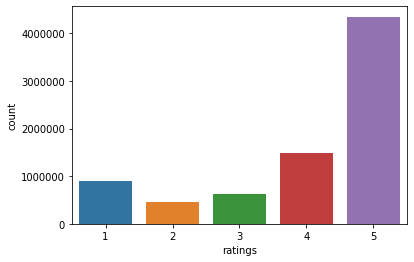

In [127]:
sns.countplot(x='ratings',data=electronics_ratings)

#### Inference from above: Rating of 5 has been given the most (>4million),followed by a rating for 4 and rating for 3.  Rating of  2 is given the least (~4.5million)

## Step 2 Take a subset of the dataset to make it less sparse/ denser.

#### Take the users who has given only 50 or more number of ratings

In [132]:
userRatings_Counts=electronics_ratings['userId'].value_counts()

In [133]:
electronics_ratings=electronics_ratings[electronics_ratings['userId'].isin(userRatings_Counts[userRatings_Counts>=50].index)]
electronics_ratings.head(5)

,userId,productId,ratings
93,A3BY5KCNQZXV5U,0594451647,5
117,AT09WGFUM934H,0594481813,3
176,A32HSNCNPRUMTR,0970407998,1
177,A17HMM1M7T9PJ1,0970407998,4
491,A3CLWR1UUZT6TG,0972683275,5


In [134]:
electronics_ratings.shape

(125871, 3)

## Step 3 Build Popularity Recommender model

#### Get the mean of the ratings for each product

In [172]:
electronics_ratings.groupby('productId')['ratings'].mean().head()

productId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: ratings, dtype: float64

#### Get the top mean ratings by using ascending=false

In [173]:
electronics_ratings.groupby('productId')['ratings'].mean().sort_values(ascending=False).head()

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: ratings, dtype: float64

#### Get the products which are rated from most to least.

In [176]:
electronics_ratings.groupby('productId')['ratings'].count().sort_values(ascending=False).head()

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: ratings, dtype: int64

#### Creating a dataframe ratings_mean_count having mean ratings along with total number of ratings for each product
#### It depicts the popularity based recommendation model which doesnt take into account the user profile.

In [188]:
ratings_mean_count['mean_Ratings']=pd.DataFrame(electronics_ratings.groupby('productId')['ratings'].mean())
ratings_mean_count['rating_counts']=pd.DataFrame(electronics_ratings.groupby('productId')['ratings'].count())
ratings_mean_count.head()

,rating_counts,mean_Ratings
productId,,
0594451647,1,5.000000
0594481813,1,3.000000
0970407998,2,2.500000
0972683275,4,4.750000
1400501466,6,3.333333


## Step 4 Build Collaborative Filtering model

In [247]:
from surprise import KNNWithMeans,KNNBaseline,KNNWithZScore
from surprise import Dataset,Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

In [145]:
reader=Reader(rating_scale=(1,5))
data=Dataset.load_from_df(electronics_ratings,reader)

## Step 5 Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [146]:
trainset, testset = train_test_split(data, test_size=.3)

### 5.1 Using User User Collaborative Filtering Model with ----KNNWithMeans ALGORITHM---- ->user_based': True

In [161]:
algo = KNNWithMeans(k=15, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [162]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [163]:
test_pred

[Prediction(uid='AEIB3UR05OP7A', iid='B0099SMFVQ', r_ui=5.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='A2VH0UT5EQFB6P', iid='B009NUK6S4', r_ui=4.0, est=3.5338827838827838, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='A1KDUQ2HU0WD68', iid='B00HRQB28Y', r_ui=5.0, est=4.67312703455122, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid='A3D5B2CBFNJB0K', iid='B00F0DD0I6', r_ui=5.0, est=4.162162162162162, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A35IX2GE0VC0JP', iid='B0049ZE9JA', r_ui=5.0, est=3.66, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A20ZM879PCQQEZ', iid='B007MXGG5Q', r_ui=4.0, est=4.262595194588521, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A1KD8NJPZ01R37', iid='B0006ZM4XK', r_ui=4.0, est=4.262595194588521, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A18OTCHQ6MX

### 5.2 Using User User Collaborative Filtering Model with ----KNNBaseline Algorithm------

In [242]:
# fit the model
algo = KNNBaseline(k=15, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

# run the trained model against the testset
test_pred_KNNBaseline = algo.test(testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


### 5.3 Using User User Collaborative Filtering Model with -----KNNWithZScore Algorithm------

In [248]:
# fit the model
algo = KNNWithZScore(k=15, sim_options={'name': 'pearson_baseline', 'user_based': True})
algo.fit(trainset)

# run the trained model against the testset
test_pred_KNNWithZScore = algo.test(testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


## STEP 6 Evaluate both the models.

### 6.1 Getting the RMSE for Collaborative Filtering using "KNNWithMeans" alogorithm Model(User-User based)

In [252]:
print("User-User based Collaborative Filtering Model: KNNWithMeans : Test Set")
accuracy.rmse(test_pred, verbose=True)

User-User based Collaborative Filtering Model: KNNWithMeans : Test Set
RMSE: 1.0601


1.0601311561825715

#### Getting the MAE(Mean Absolute Error)

In [253]:
accuracy.mae(test_pred,verbose=True)

MAE:  0.7806


0.7806159559457233

### 6.2 Getting the RMSE for Collaborative Filtering using "KNNBaseline" algorithm Model(User-User based)

In [254]:
print("User-User based Collaborative Filtering Model : KNNBaseline:Test Set :")
accuracy.rmse(test_pred_KNNBaseline, verbose=True)

User-User based Collaborative Filtering Model : KNNBaseline:Test Set :
RMSE: 1.0295


1.029499051022781

#### Getting the MAE(Mean Absolute Error)

In [255]:
accuracy.mae(test_pred_KNNBaseline,verbose=True)

MAE:  0.7533


0.7532693162948567

### 6.3 Getting the RMSE for Collaborative Filtering using "KNNWithZScore" algorithm Model(User-User based)

In [256]:
print("User-User based Collaborative Filtering Model :KNNWithZScore:Test Set :")
accuracy.rmse(test_pred_KNNWithZScore, verbose=True)

User-User based Collaborative Filtering Model :KNNWithZScore:Test Set :
RMSE: 1.0611


1.061078671698005

#### Getting the MAE(Mean Absolute Error)

In [257]:
accuracy.mae(test_pred_KNNWithZScore,verbose=True)

MAE:  0.7787


0.7786876535396124

## Step 7 Get top - K ( K = 5) recommendations.Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

#### Created a dataframe from test_pred (predictions from the test data)

In [189]:
predictedElectrPdt=pd.DataFrame(data=test_pred,columns=['UserID','ElectronicProductId','ActualRating','PredictedRating','Details'])
predictedElectrPdt.head()

,UserID,ElectronicProductId,ActualRating,PredictedRating,Details
0,AEIB3UR05OP7A,B0099SMFVQ,5.0,5.000000,"{'actual_k': 2, 'was_impossible': False}"
1,A2VH0UT5EQFB6P,B009NUK6S4,4.0,3.533883,"{'actual_k': 1, 'was_impossible': False}"
2,A1KDUQ2HU0WD68,B00HRQB28Y,5.0,4.673127,"{'actual_k': 8, 'was_impossible': False}"
3,A3D5B2CBFNJB0K,B00F0DD0I6,5.0,4.162162,"{'actual_k': 0, 'was_impossible': False}"
4,A35IX2GE0VC0JP,B0049ZE9JA,5.0,3.660000,"{'actual_k': 0, 'was_impossible': False}"


In [192]:
# Assigning the user's id  to a variable
user='A1E1LEVQ9VQNK'

#### Displaying Top Product ratings given by the user A1E1LEVQ9VQNK

In [204]:
predictedRatings_user=predictedElectrPdt[predictedElectrPdt['UserID']==user]
predictedRatings_user=predictedRatings_user.sort_values(by='PredictedRating',ascending=False)
predictedRatings_user.head()

,UserID,ElectronicProductId,ActualRating,PredictedRating,Details
455,A1E1LEVQ9VQNK,B00IP8IBYG,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}"
26459,A1E1LEVQ9VQNK,B003LVZO88,5.0,5.0,"{'actual_k': 2, 'was_impossible': False}"
17427,A1E1LEVQ9VQNK,B00DVEJA7G,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}"
661,A1E1LEVQ9VQNK,B005HMKKH4,5.0,5.0,"{'actual_k': 5, 'was_impossible': False}"
18656,A1E1LEVQ9VQNK,B00DKBU5W4,5.0,5.0,"{'actual_k': 4, 'was_impossible': False}"


#### Getting the products which aren't rated by the user A1E1LEVQ9VQNK

In [231]:
notPredictedByGivenUser=predictedElectrPdt[predictedElectrPdt['UserID']!=user]
notPredictedByGivenUser.head()

,UserID,ElectronicProductId,ActualRating,PredictedRating,Details
0,AEIB3UR05OP7A,B0099SMFVQ,5.0,5.000000,"{'actual_k': 2, 'was_impossible': False}"
1,A2VH0UT5EQFB6P,B009NUK6S4,4.0,3.533883,"{'actual_k': 1, 'was_impossible': False}"
2,A1KDUQ2HU0WD68,B00HRQB28Y,5.0,4.673127,"{'actual_k': 8, 'was_impossible': False}"
3,A3D5B2CBFNJB0K,B00F0DD0I6,5.0,4.162162,"{'actual_k': 0, 'was_impossible': False}"
4,A35IX2GE0VC0JP,B0049ZE9JA,5.0,3.660000,"{'actual_k': 0, 'was_impossible': False}"


In [232]:
notPredictedByGivenUser=notPredictedByGivenUser.drop('UserID',axis=1)

##    Top 5 Electronic Products Recommendations for the user with id A1E1LEVQ9VQNK

In [239]:
notPredictedByGivenUser.sort_values(by='PredictedRating',ascending=False).head(5)

,ElectronicProductId,ActualRating,PredictedRating,Details
0,B0099SMFVQ,5.0,5.0,"{'actual_k': 2, 'was_impossible': False}"
11383,B000X24ISU,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}"
6419,B00KLGSQJ0,4.0,5.0,"{'actual_k': 2, 'was_impossible': False}"
21412,B0079TOET8,3.0,5.0,"{'actual_k': 1, 'was_impossible': False}"
26447,B0079R8KO0,5.0,5.0,"{'actual_k': 2, 'was_impossible': False}"


## Step 8 Summarise your insights

### If we benchmark the following algorithms for collaborative filtering on user user based :KNNWithMeans , KNNBaseline and KNNWithZScore
### KNNBaseline alogorthm comes out with least RMSE: 1.0611 and MAE :0.7806 thus predicts much better than the other algorithms
### Out of KNNWithMeans and KNNWithZScore algorithms , KNNWithZScore(MAE=0.7787,RMSE: 1.0611) is better than KNNWithMeans(MAE= 0.7806,RMSE: 1.0601) since MAE is EASEIR TO JUSTIFY THAN RMSE

### Popularity Based recommendation model gives the top rated products to the user and IT DOESNT take INTO ACCOUNT USER Profiles which the Collaborative Based Recommendation Model does.